# AIR PARADISE
### Context :
#### Dans le but de fournir un meilleur service à ses clients, AIR PARADISE, une compagnie aérienne spécialisée dans les vols aux Etats-Unis, décide de créer un chatbot pour aider à réserver des vols.
#### Le chatbot doit prendre en compte les informations biométriques pour délivrer un billet d’avion et prendre les informations de carte bancaire pour effectuer une réservation de billet.
#### Dans un premier temps, le chatbot prédit les prix des vols à l’aide d’un ensemble de données fourni. Une fois les prix des vols prédits, l’ensemble de données généré (contenant désormais les prix des vols prévus) servira de base à la création de réservation de vols.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Lecture du fichier
df = pd.read_csv("flights.csv")

# Afficher les premières lignes
display(df.head())

# Informations générales
df.info()

# Statistique descriptive
df.describe()


C:\Users\user\AppData\Local\Temp\ipykernel_33068\2745160592.py:12: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


### Nettoyage des données

In [3]:
# Suppression des doublons
print("Suppression des doublons...")
df = df.drop_duplicates()

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes :\n", missing_values)

Suppression des doublons...
Valeurs manquantes :
 YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY       

#### Etant donné que les valeurs manquantes étaient nombreuses, je ne pouvais pas les supprimer par peur de biaiser l'analyse. 
#### Alors j'aidécidé de remplacer les colonnes à valeurs numériques par la médiane et celles à valeur catégorielles par le mode

In [4]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Variables catégoriques
            df[col].fillna(df[col].mode()[0], inplace=True)  # Remplacement par la valeur la plus fréquente
        else:  # Variables numériques
            df[col].fillna(df[col].median(), inplace=True)  # Remplacement par la médiane
    return df

df = fill_missing_values(df)

# Vérification après nettoyage
print("Vérification après nettoyage :")
print("Valeurs manquantes après nettoyage :\n", df.isnull().sum())
display(df.head())

C:\Users\user\AppData\Local\Temp\ipykernel_33068\47752838.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Remplacement par la médiane
C:\Users\user\AppData\Local\Temp\ipykernel_33068\47752838.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

Vérification après nettoyage :
Valeurs manquantes après nettoyage :
 YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,B,2.0,0.0,2.0,3.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,B,2.0,0.0,2.0,3.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,B,2.0,0.0,2.0,3.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,B,2.0,0.0,2.0,3.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,B,2.0,0.0,2.0,3.0,0.0


#### Passons à la visualisation des valeurs abérantes

In [5]:
# # Visualisation avec des boxplots
# plt.figure(figsize=(12, 6))
# df.select_dtypes(include=np.number).boxplot(rot=90)
# plt.title("Boxplots des variables numériques (détection de valeurs aberrantes)")
# plt.show()


#### Etant donné que nous n'avons pas les prix dans notre dataset, nous allons utiliser les variables déterminates du prix des vols pour prédire les prix

In [6]:
# Sélection des variables pour la prédiction du prix
variables_utiles = ['DISTANCE', 'AIRLINE', 'MONTH', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_DEPARTURE', 'TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME', 'SCHEDULED_TIME', 'WHEELS_OFF', 'WHEELS_ON']
df = df[variables_utiles]

In [7]:
# Encodage des variables catégoriques
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['AIRLINE'] = le.fit_transform(df['AIRLINE'])

# Création de la cible (Prix) - Simulée pour l'exemple
df['prix'] = (df['DISTANCE'] * 0.1 + df['ELAPSED_TIME'] * 0.05 + df['TAXI_OUT'] * 0.02 + df['SCHEDULED_TIME'] * 0.03 + np.random.normal(0, 50, len(df)))  # Approximation améliorée


In [8]:
print(df.prix.head(100))

0     214.806225
1     279.609131
2     267.847049
3     153.343639
4     248.556883
         ...    
95     90.673488
96     46.935464
97    175.444808
98     18.827180
99     28.530036
Name: prix, Length: 100, dtype: float64


#### On divise nos données pour l'ntrainement et le test

In [9]:
X = df.drop(columns=['prix'])
y = df['prix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Entraînement du modèle et prédiction 

In [10]:
# model = RandomForestRegressor(n_estimators=15, random_state=42)
# model.fit(X_train, y_train)
# Entraîner le modèle XGBoost
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
# Prédictions
y_pred = model.predict(X_test)


#### Evaluation du modèle

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 39.877279172173125, MSE: 2498.6923503630874, RMSE: 49.98692179323595


#### Visualisons maintenant comment le prix des billet d'avion à évoluer au cours de l'année

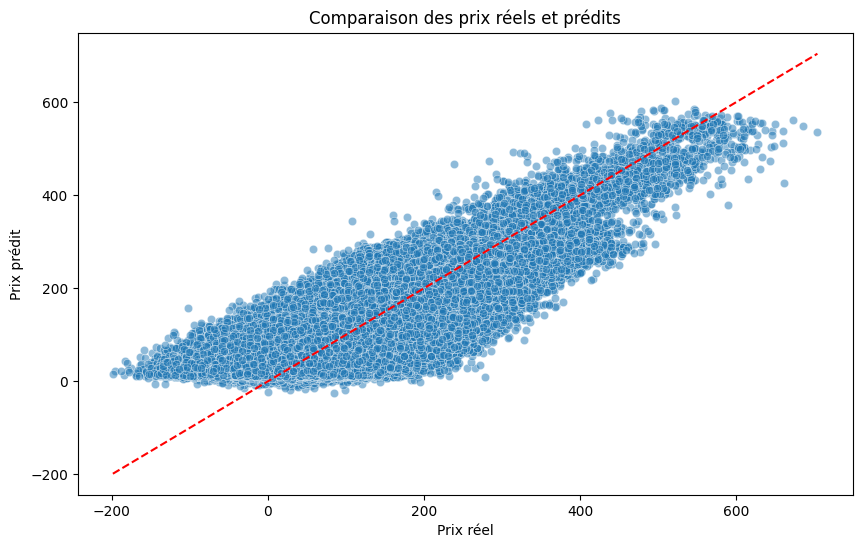

In [12]:
# Visualisation des prédictions vs réels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("Comparaison des prix réels et prédits")
plt.show()

In [13]:
display(df)

,DISTANCE,AIRLINE,MONTH,DAY_OF_WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_DEPARTURE,TAXI_OUT,ELAPSED_TIME,AIR_TIME,SCHEDULED_TIME,WHEELS_OFF,WHEELS_ON,prix
0,1448,1,1,4,-11.0,-22.0,5,21.0,194.0,169.0,205.0,15.0,404.0,214.806225
1,2330,0,1,4,-8.0,-9.0,10,12.0,279.0,263.0,280.0,14.0,737.0,279.609131
2,2296,11,1,4,-2.0,5.0,20,16.0,293.0,266.0,286.0,34.0,800.0,267.847049
3,2342,0,1,4,-5.0,-9.0,20,15.0,281.0,258.0,285.0,30.0,748.0,153.343639
4,1448,1,1,4,-1.0,-21.0,25,11.0,215.0,199.0,235.0,35.0,254.0,248.556883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2611,2,12,4,-4.0,-26.0,2359,22.0,298.0,272.0,320.0,17.0,749.0,256.417556
5819075,1617,2,12,4,-4.0,-16.0,2359,17.0,215.0,195.0,227.0,12.0,427.0,164.741264
5819076,1598,2,12,4,-9.0,-8.0,2359,17.0,222.0,197.0,221.0,7.0,424.0,201.949455
5819077,1189,2,12,4,-6.0,-10.0,2359,10.0,157.0,144.0,161.0,3.0,327.0,141.079668


#### Exportons notre dataset pour construire notre chatbot

In [14]:
df.to_csv("dataset_nettoye.csv", index=False)


#### Exportons le model

In [15]:
# Sauvegarder le modèle
import pickle
with open('price_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)